In [28]:
pip install tensorflow

In [2]:
from tensorflow.keras import backend as K
K.clear_session()

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow import keras
import numpy as np
import pandas as pd
import os
plt.rcParams['figure.figsize'] = (10, 10)

In [4]:

import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory


dataset = image_dataset_from_directory(
    "photo_collection",         
    image_size=(224, 224),      
    batch_size=32              
)

class_names = dataset.class_names
print(class_names)


Found 223 files belonging to 9 classes.
['blue_highlighter', 'blue_pen', 'eraser', 'lotion', 'mouse', 'multi_color_pen', 'oil_based_pen', 'pen_refill', 'yellow_highlighter']


# Instantiate the model

In [5]:
vgg_model = keras.applications.vgg16.VGG16(weights="imagenet")

In [6]:
vgg_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

# Base model

Exclude the top part, referring to the classification layers. Doing so our model is capable of extracting features.

In [7]:
base_model = keras.applications.vgg16.VGG16(weights="imagenet", input_shape=(224, 224, 3), include_top=False)

In [8]:
base_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

# 2 Layers: Trainable or Not?

In [9]:
#Freeze all layers

In [10]:
for layer in base_model.layers: # 모든 레이어 일단 얼음만들기 , 이제는 가중치나, params를 훈련을 하거나 업데이트 할수 없어요. 
    layer.trainable = False 

# 3 Load the data

In [11]:
# data folder
base_path = "photo_collection/"

# Define classes
classes = os.listdir(base_path)
classes


['.ipynb_checkpoints',
 'blue_highlighter',
 'blue_pen',
 'eraser',
 'lotion',
 'mouse',
 'multi_color_pen',
 'oil_based_pen',
 'pen_refill',
 'yellow_highlighter']

In [12]:
# Custom function to load all images as arrays
def load_image(base_path):
    
    X_list = []
    y_list = []
    classes = os.listdir(base_path)
    for class_ in classes:
        files = os.listdir(base_path+class_)
        for file in files:
            pic = keras.preprocessing.image.load_img(path=f'{base_path}{class_}/{file}', target_size=(224, 224))
            numpy_image = np.array(pic)
            # Transform numpy image to the required vgg16 format 
            processed_image = preprocess_input(numpy_image)
            X_list.append(processed_image)
            y_list.append(class_)
        X = np.array(X_list)
        y = np.array(y_list)
    return X, y, classes


In [13]:
X, y, classes = load_image(base_path)

In [14]:
X.shape

(223, 224, 224, 3)

In [15]:
classes

['.ipynb_checkpoints',
 'blue_highlighter',
 'blue_pen',
 'eraser',
 'lotion',
 'mouse',
 'multi_color_pen',
 'oil_based_pen',
 'pen_refill',
 'yellow_highlighter']

In [16]:
import os

base_path = "photo_collection/"

classes = [
    c for c in os.listdir(base_path)
    if not c.startswith('.') and os.path.isdir(os.path.join(base_path, c))
]

print(classes)


['blue_highlighter', 'blue_pen', 'eraser', 'lotion', 'mouse', 'multi_color_pen', 'oil_based_pen', 'pen_refill', 'yellow_highlighter']


# Convert y to categorical

In [17]:
y_series = pd.Series(y).map({classes[0]:0, classes[1]:1})  

y_copy = y_series.copy

In [18]:
y_copy

<bound method NDFrame.copy of 0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
218    NaN
219    NaN
220    NaN
221    NaN
222    NaN
Length: 223, dtype: float64>

In [19]:
from sklearn.preprocessing import LabelEncoder  

le = LabelEncoder()
y_encoded = le.fit_transform(y)

print(le.classes_)  
print(np.unique(y_encoded))  


['blue_highlighter' 'blue_pen' 'eraser' 'lotion' 'mouse' 'multi_color_pen'
 'oil_based_pen' 'pen_refill' 'yellow_highlighter']
[0 1 2 3 4 5 6 7 8]


# Configure the model 

In [20]:
from tensorflow.keras import Input, layers, models

new_model = models.Sequential([

    base_model,

    layers.Flatten(),

    layers.Dense(units=30, activation='relu'),
    
    layers.Dense(units=15, activation='relu'),

    layers.Dense(9, activation='softmax')   
])




In [21]:
new_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 30)             │       752,670 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │           465 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 9)              │           144 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,467,967 (59.01 MB)

 Trainable params: 753,279 (2.87 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

# Compile the model

In [22]:
new_model.compile(
    loss='sparse_categorical_crossentropy',  
    optimizer='adam',
    metrics=['accuracy']
)

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y_encoded,   
    test_size=0.2, 
    stratify=y_encoded,
    random_state=42
)


In [24]:
history = new_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20
)

Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step - accuracy: 0.2173 - loss: 4.2381 - val_accuracy: 0.5778 - val_loss: 1.7266
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 17s 3s/step - accuracy: 0.6368 - loss: 1.5816 - val_accuracy: 0.6222 - val_loss: 1.7003
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 17s 3s/step - accuracy: 0.6612 - loss: 1.3330 - val_accuracy: 0.7333 - val_loss: 1.1456
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 16s 3s/step - accuracy: 0.7444 - loss: 0.8958 - val_accuracy: 0.7556 - val_loss: 0.8982
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 17s 3s/step - accuracy: 0.8360 - loss: 0.4267 - val_accuracy: 0.7778 - val_loss: 0.8027
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 17s 3s/step - accuracy: 0.8838 - loss: 0.2940 - val_accuracy: 0.7778 - val_loss: 0.6085
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 17s 3s/step - accuracy: 0.9158 - loss: 0.2207 - val_accuracy: 0.7778 - val_loss: 0.5497
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 17s 3s/step - accuracy: 0.9245 - loss: 0.1670 - val_accuracy: 0.8000 - val_loss: 0.6797
Epoch 9/

# validation / tunning

In [25]:
for layer in base_model.layers[-5:]:
    layer.trainable = True

new_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=keras.optimizers.Adam(learning_rate=1e-5),
    metrics=['accuracy']
)

In [26]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)  

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y_encoded,
    test_size=0.2,
    stratify=y_encoded,
    random_state=42
)

In [27]:
history = new_model.fit(X_train, y_train,
                        validation_data=(X_val, y_val),
                        epochs=20)


Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 23s 4s/step - accuracy: 0.9846 - loss: 0.0229 - val_accuracy: 0.8667 - val_loss: 1.2120
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 21s 4s/step - accuracy: 0.9939 - loss: 0.0147 - val_accuracy: 0.8444 - val_loss: 1.4348
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.9857 - loss: 0.0188 - val_accuracy: 0.8222 - val_loss: 1.6479
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.9964 - loss: 0.0068 - val_accuracy: 0.8000 - val_loss: 1.8823
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 21s 4s/step - accuracy: 0.9927 - loss: 0.0193 - val_accuracy: 0.8222 - val_loss: 2.4364
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 22s 4s/step - accuracy: 0.9853 - loss: 0.0231 - val_accuracy: 0.8222 - val_loss: 2.0798
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 21s 4s/step - accuracy: 0.9949 - loss: 0.0120 - val_accuracy: 0.8222 - val_loss: 2.0485
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 22s 4s/step - accuracy: 0.9964 - loss: 0.0129 - val_accuracy: 0.8222 - val_loss: 2.2919
Epoch 9/

# Metrics

2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step


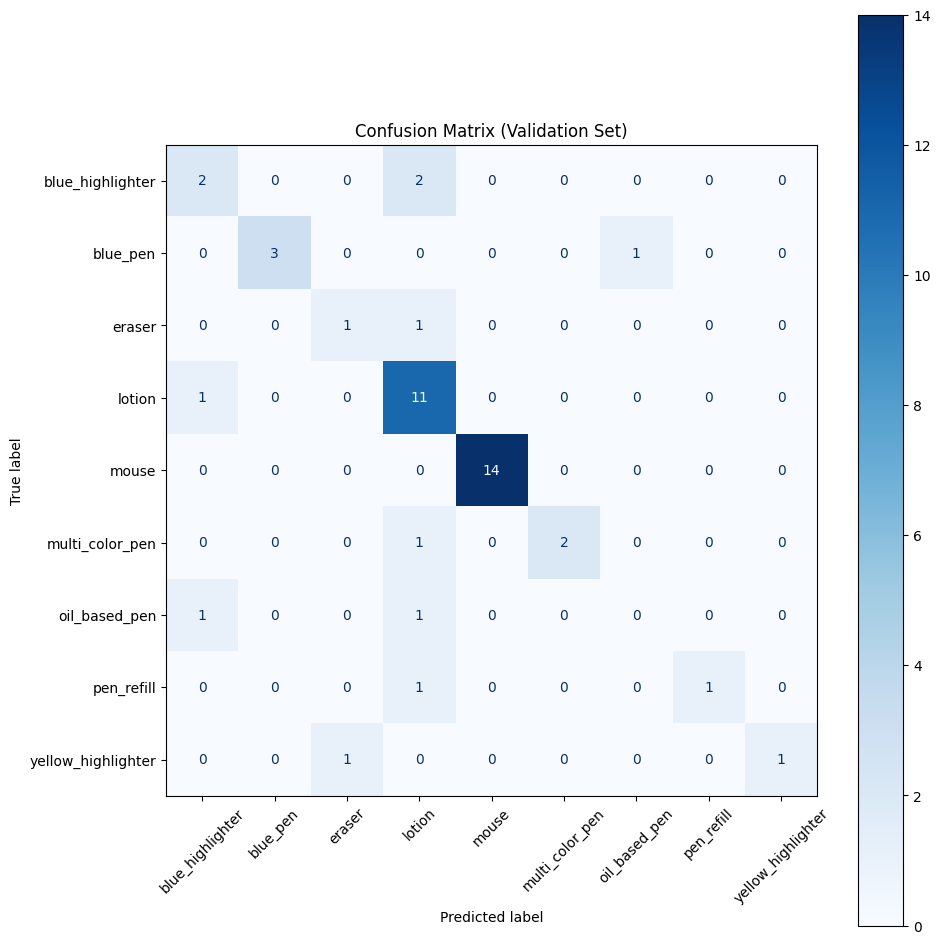

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred_probs = new_model.predict(X_val)            
y_pred = y_pred_probs.argmax(axis=1)               

cm = confusion_matrix(y_val, y_pred)

class_names = le.classes_                          

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix (Validation Set)")
plt.tight_layout()
plt.show()


In [32]:
from sklearn.metrics import classification_report

report = classification_report(y_val, y_pred, target_names=class_names)
print(report)

                    precision    recall  f1-score   support

  blue_highlighter       0.50      0.50      0.50         4
          blue_pen       1.00      0.75      0.86         4
            eraser       0.50      0.50      0.50         2
            lotion       0.65      0.92      0.76        12
             mouse       1.00      1.00      1.00        14
   multi_color_pen       1.00      0.67      0.80         3
     oil_based_pen       0.00      0.00      0.00         2
        pen_refill       1.00      0.50      0.67         2
yellow_highlighter       1.00      0.50      0.67         2

          accuracy                           0.78        45
         macro avg       0.74      0.59      0.64        45
      weighted avg       0.79      0.78      0.77        45

